In [1]:
import pandas as pd

In [3]:
# https://data.ace.uq.edu.au/public/gtdb/data/releases/release220/220.0/bac120_taxonomy_r220.tsv

In [43]:
bracken_species=pd.read_csv(
    "/shared/projects/mudis4ls_is4_benchmark/test_results/kraken/gtdb/test_Species.bracken", sep="\t"
    )

In [44]:
bracken_species

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Bacteroides stercoris,46506,S,3744,2,3746,0.07276
1,Bacteroides uniformis,820,S,2991,0,2991,0.05809
2,Bacteroides xylanisolvens,371601,S,1448,0,1448,0.02812
3,Bacteroides finegoldii,338188,S,994,0,994,0.01931
4,Bacteroides ovatus,28116,S,794,0,794,0.01542
...,...,...,...,...,...,...,...
1077,Methanolobus mangrovi,3072977,S,1,0,1,0.00002
1078,Homo sapiens,9606,S,5,0,5,0.00010
1079,Junduvirus communis,2956034,S,10,0,10,0.00019
1080,Junduvirus copri,2956035,S,1,0,1,0.00002


In [ ]:


# Charger les fichiers GTDB pour les bactéries et les archées
# bac120_gtdb = pd.read_csv(
#     "/shared/projects/mudis4ls_is4_benchmark/gtdb/bac120_taxonomy_r220.tsv",
#     sep="\t", header=None, names=["species_id", "taxonomy"]
# )

# ar53_gtdb = pd.read_csv(
#     "/shared/projects/mudis4ls_is4_benchmark/gtdb/ar53_taxonomy_r220.tsv",
#     sep="\t", header=None, names=["species_id", "taxonomy"]
# )

# # Extraire les genres (g__) pour bactéries et archées
# bac120_gtdb["genus"] = bac120_gtdb["taxonomy"].str.extract(r";g__([^;]+)")
# ar53_gtdb["genus"] = ar53_gtdb["taxonomy"].str.extract(r";g__([^;]+)")

# # Fusionner les genres des deux fichiers en un seul ensemble
# known_genera = set(pd.concat([bac120_gtdb["genus"], ar53_gtdb["genus"]]).dropna().unique())

# # Vérification : Afficher les 10 premiers genres valides
# print("Exemple de genres valides:", list(known_genera)[:10])




Exemple de genres valides: ['Ideonella', 'JAPYPO01', 'JAGVGS01', 'JAHEJV01', 'Calescibacterium', 'JACRJP01', 'JAIPEW01', 'JAAYSX01', 'JAKVBY01', 'RGIG3171']


In [ ]:
# ### Fonction mise à jour pour extraire le genre et l'espèce ###
# def extract_genus_species(species_name):
#     words = species_name.split()

#     # Si le premier mot est un genre connu, on l'extrait normalement
#     if words[0] in known_genera:
#         genus = words[0]
#         species = " ".join(words[1:]) if len(words) > 1 else "sp."
#     else:
#         # Si inconnu : 
#         # - genus = tout sauf le dernier mot
#         # - species = dernier mot
#         # genus = " ".join(words[:-1]) if len(words) > 1 else words[0]
#         species = words[-1]

#     return genus, species

# # Appliquer la fonction sur la colonne "species" du dataframe Bracken
# bracken_species[["genus", "species"]] = bracken_species["name"].apply(
#     lambda x: pd.Series(extract_genus_species(x))
# )


In [49]:
def extract_genus_species(species_name):
    words = species_name.split()

    genus = words[0]
    species = " ".join(words)
    return genus, species

# Appliquer la fonction sur la colonne "species" du dataframe Bracken
bracken_species[["genus", "species"]] = bracken_species["name"].apply(
    lambda x: pd.Series(extract_genus_species(x))
)


In [50]:
bracken_species

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,genus,species
0,Bacteroides stercoris,46506,S,3744,2,3746,0.07276,Bacteroides,Bacteroides stercoris
1,Bacteroides uniformis,820,S,2991,0,2991,0.05809,Bacteroides,Bacteroides uniformis
2,Bacteroides xylanisolvens,371601,S,1448,0,1448,0.02812,Bacteroides,Bacteroides xylanisolvens
3,Bacteroides finegoldii,338188,S,994,0,994,0.01931,Bacteroides,Bacteroides finegoldii
4,Bacteroides ovatus,28116,S,794,0,794,0.01542,Bacteroides,Bacteroides ovatus
...,...,...,...,...,...,...,...,...,...
1077,Methanolobus mangrovi,3072977,S,1,0,1,0.00002,Methanolobus,Methanolobus mangrovi
1078,Homo sapiens,9606,S,5,0,5,0.00010,Homo,Homo sapiens
1079,Junduvirus communis,2956034,S,10,0,10,0.00019,Junduvirus,Junduvirus communis
1080,Junduvirus copri,2956035,S,1,0,1,0.00002,Junduvirus,Junduvirus copri


In [51]:
bracken_species.rename(columns={"fraction_total_reads": "kraken_fraction_total_reads"}, inplace=True)

In [52]:
bracken_essentials=bracken_species.drop(
    columns=["name", "taxonomy_lvl","kraken_assigned_reads","added_reads","new_est_reads"]
    )

In [53]:
bracken_essentials.rename(columns={"taxonomy_id": "ncbi_taxonomy_id"}, inplace=True)

In [54]:
bracken_essentials

,ncbi_taxonomy_id,kraken_fraction_total_reads,genus,species
0,46506,0.07276,Bacteroides,Bacteroides stercoris
1,820,0.05809,Bacteroides,Bacteroides uniformis
2,371601,0.02812,Bacteroides,Bacteroides xylanisolvens
3,338188,0.01931,Bacteroides,Bacteroides finegoldii
4,28116,0.01542,Bacteroides,Bacteroides ovatus
...,...,...,...,...
1077,3072977,0.00002,Methanolobus,Methanolobus mangrovi
1078,9606,0.00010,Homo,Homo sapiens
1079,2956034,0.00019,Junduvirus,Junduvirus communis
1080,2956035,0.00002,Junduvirus,Junduvirus copri


In [ ]:
# ncbi_to_gtdb_archae=pd.read_excel(
#     "/shared/projects/mudis4ls_is4_benchmark/gtdb/ncbi_vs_gtdb_r220_archaea.xlsx"
# )

In [ ]:
# ncbi_to_gtdb_bacteria=pd.read_excel(
#     "/shared/projects/mudis4ls_is4_benchmark/gtdb/ncbi_vs_gtdb_r220_bacteria.xlsx"
#     )

In [ ]:
#on va essayer de mapper le tax id de ncbi avec la taxonomie gtdb comme ca le merge sera plus facile

In [55]:
sylph_meteor=pd.read_csv(
    "/shared/projects/mudis4ls_is4_benchmark/test_results/compare_outputs/sylph_meteor_bracken/meteor_sylph.tsv", sep="\t"
    )

In [56]:
sylph_meteor

,msp_name,abundance_meteor,gtdb_r220_classification,superkingdom,phylum,class,order,family,genus,species,msp,abundance_sylph,sequence_abundance,ANI (if strain-level),Coverage (if strain-level)
0,NaN,NaN,d__Bacteria,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0000,100.0001,NaN,NaN
1,msp_0584,0.006384,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,Bacteria,Actinomycetota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Anaerotardibacter,Anaerotardibacter sp000435675,msp_0584,NaN,NaN,NaN,NaN
2,msp_0573,0.006947,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,Bacteria,Actinomycetota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Eggerthella,Eggerthella lenta,msp_0573,NaN,NaN,NaN,NaN
3,NaN,NaN,d__Bacteria;p__Bacillota_A,Bacteria,Bacillota_A,NaN,NaN,NaN,NaN,NaN,NaN,41.4963,36.1829,NaN,NaN
4,NaN,NaN,d__Bacteria;p__Bacillota_A;c__Clostridia,Bacteria,Bacillota_A,Clostridia,NaN,NaN,NaN,NaN,NaN,41.4963,36.1829,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,NaN,NaN,NaN,1.3124,0.9629,NaN,NaN
135,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,NaN,NaN,1.3124,0.9629,NaN,NaN
136,msp_0280,0.030240,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,Sutterella wadsworthensis_A,msp_0280,1.3124,0.9629,NaN,NaN
137,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,Sutterella wadsworthensis_A,NaN,1.3124,0.9629,98.48,0.035


In [59]:
# Liste des colonnes actuelles
cols = list(sylph_meteor.columns)

# Déplacer les colonnes 'x' et 'y' en 2e et 3e position
new_order = ["species","gtdb_r220_classification","abundance_meteor", "abundance_sylph"] + [col for col in cols if col not in ["species","abundance_meteor", "abundance_sylph", "gtdb_r220_classification"]]
# new_order = ["species"] + [col for col in cols if col not in ["species"]]

# Réorganiser le DataFrame
sylph_meteor = sylph_meteor[new_order]


In [60]:
sylph_meteor

,species,gtdb_r220_classification,abundance_meteor,abundance_sylph,msp_name,superkingdom,phylum,class,order,family,genus,msp,sequence_abundance,ANI (if strain-level),Coverage (if strain-level)
0,NaN,d__Bacteria,NaN,100.0000,NaN,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,100.0001,NaN,NaN
1,Anaerotardibacter sp000435675,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,0.006384,NaN,msp_0584,Bacteria,Actinomycetota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Anaerotardibacter,msp_0584,NaN,NaN,NaN
2,Eggerthella lenta,d__Bacteria;p__Actinomycetota;c__Coriobacterii...,0.006947,NaN,msp_0573,Bacteria,Actinomycetota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Eggerthella,msp_0573,NaN,NaN,NaN
3,NaN,d__Bacteria;p__Bacillota_A,NaN,41.4963,NaN,Bacteria,Bacillota_A,NaN,NaN,NaN,NaN,NaN,36.1829,NaN,NaN
4,NaN,d__Bacteria;p__Bacillota_A;c__Clostridia,NaN,41.4963,NaN,Bacteria,Bacillota_A,Clostridia,NaN,NaN,NaN,NaN,36.1829,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,NaN,NaN,0.9629,NaN,NaN
135,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,NaN,0.9629,NaN,NaN
136,Sutterella wadsworthensis_A,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,0.030240,1.3124,msp_0280,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,msp_0280,0.9629,NaN,NaN
137,Sutterella wadsworthensis_A,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Sutterella,NaN,0.9629,98.48,0.035


In [ ]:
# bracken_essentials["species"] = bracken_essentials["genus"] + " " + bracken_essentials["species"]


In [64]:
sylph_meteor_bracken=pd.merge(
    sylph_meteor, bracken_essentials, on=("species","genus"), how="outer"
    )

In [66]:
sylph_meteor_bracken.rename(columns={"kraken_fraction_total_reads": "abundance_kraken"}, inplace=True)

In [70]:
cols = list(sylph_meteor_bracken.columns)

# Déplacer les colonnes 'x' et 'y' en 2e et 3e position
new_order = ["species","abundance_kraken","abundance_meteor","abundance_sylph"] + [col for col in cols if col not in ["species","abundance_kraken","abundance_meteor","abundance_sylph"]]
# new_order = ["species"] + [col for col in cols if col not in ["species"]]

# Réorganiser le DataFrame
sylph_meteor_bracken = sylph_meteor_bracken[new_order]

In [71]:
sylph_meteor_bracken

,species,abundance_kraken,abundance_meteor,abundance_sylph,gtdb_r220_classification,msp_name,superkingdom,phylum,class,order,family,genus,msp,sequence_abundance,ANI (if strain-level),Coverage (if strain-level),ncbi_taxonomy_id
0,Abyssibius alkaniclasticus,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abyssibius,NaN,NaN,NaN,NaN,2881234.0
1,Acetivibrio saccincola,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acetivibrio,NaN,NaN,NaN,NaN,1677857.0
2,Acetivibrio thermocellus,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acetivibrio,NaN,NaN,NaN,NaN,1515.0
3,Acetobacter aceti,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acetobacter,NaN,NaN,NaN,NaN,435.0
4,Acetobacter persici,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acetobacter,NaN,NaN,NaN,NaN,1076596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,NaN,NaN,NaN,2.9883,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,NaN,Bacteria,Pseudomonadota,Alphaproteobacteria,RF32,NaN,NaN,NaN,1.3483,NaN,NaN,NaN
1184,NaN,NaN,NaN,2.9883,d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...,NaN,Bacteria,Pseudomonadota,Alphaproteobacteria,RF32,CAG-239,NaN,NaN,1.3483,NaN,NaN,NaN
1185,NaN,NaN,NaN,1.3124,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,NaN,NaN,NaN,NaN,0.9629,NaN,NaN,NaN
1186,NaN,NaN,NaN,1.3124,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,NaN,NaN,NaN,0.9629,NaN,NaN,NaN


In [80]:
sylph_meteor_bracken[["abundance_meteor", "abundance_kraken"]] *= 100


In [ ]:
# Compter les lignes où abundance_sylph et abundance_metaphlan ne sont pas NaN
count = sylph_meteor_bracken[sylph_meteor_bracken[["abundance_sylph", "abundance_kraken"]].notna().all(axis=1)].shape[0]

print(count)


20


In [78]:
# Compter les lignes où abundance_sylph et abundance_metaphlan ne sont pas NaN
count = sylph_meteor_bracken[sylph_meteor_bracken[["abundance_sylph", "abundance_meteor"]].notna().all(axis=1)].shape[0]

print(count)


21


In [79]:
# Compter les lignes où abundance_sylph et abundance_metaphlan ne sont pas NaN
count = sylph_meteor_bracken[sylph_meteor_bracken[["abundance_kraken", "abundance_meteor"]].notna().all(axis=1)].shape[0]

print(count)


33


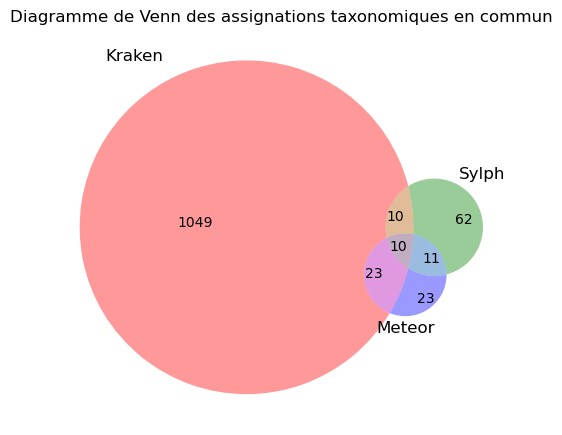

In [81]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

# Supposons que ton DataFrame s'appelle df
# Remplace df par le nom réel de ton DataFrame

# Définition des ensembles en fonction des colonnes non NaN
kraken_set = set(sylph_meteor_bracken[sylph_meteor_bracken["abundance_kraken"].notna()].index)
sylph_set = set(sylph_meteor_bracken[sylph_meteor_bracken["abundance_sylph"].notna()].index)
meteor_set = set(sylph_meteor_bracken[sylph_meteor_bracken["abundance_meteor"].notna()].index)

# Création du diagramme de Venn
plt.figure(figsize=(6,6))
venn3([kraken_set, sylph_set, meteor_set], 
      set_labels=("Kraken", "Sylph", "Meteor"))

plt.title("Diagramme de Venn des assignations taxonomiques en commun")
plt.show()


In [29]:
colonnes_a_garder = [
    "abundance_meteor", "gtdb_r220_classification", "species","abundance_sylph","kraken_fraction_total_reads"
    ]


In [30]:
sylph_meteor_bracken_species = sylph_meteor_bracken[colonnes_a_garder]


In [32]:
sylph_meteor_bracken_species.to_csv(
    "/shared/projects/mudis4ls_is4_benchmark/test_results/compare_outputs/sylph_meteor_bracken/sylph_meteor_bracken_species.tsv", sep="\t", index=False
    )

sylph_meteor_bracken_species

In [33]:
sylph_meteor_bracken_species

,abundance_meteor,gtdb_r220_classification,species,abundance_sylph,kraken_fraction_total_reads
0,NaN,NaN,Abyssibius alkaniclasticus,NaN,0.00002
1,NaN,NaN,Acetivibrio saccincola,NaN,0.00002
2,NaN,NaN,Acetivibrio thermocellus,NaN,0.00002
3,NaN,NaN,Acetobacter aceti,NaN,0.00002
4,NaN,NaN,Acetobacter persici,NaN,0.00002
...,...,...,...,...,...
3174,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,0.00004
3175,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,0.00002
3176,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,0.00010
3177,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...,NaN,1.3124,0.00019
